In [1]:
import platform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 한글 깨짐 방지
if platform.system() == 'Darwin':
    # 맥일때
    plt.rcParams["font.family"] = 'AppleGothic'
elif platform.system() == 'Windows':
    # 윈도우일때
    plt.rcParams["font.family"] = 'Malgun Gothic'

# 마이너스기호(-) 폰트 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 디렉토리 파일 확인
import os
print(os.listdir("../input_2019-2nd-ml-month-with-kakr/"))

['test.csv', 'train.csv', 'sample_submission.csv']


In [3]:
# train, test 데이터 read(dataframe)
train = pd.read_csv("../input_2019-2nd-ml-month-with-kakr/train.csv")
test = pd.read_csv("../input_2019-2nd-ml-month-with-kakr/test.csv")

In [5]:
train.shape

(15035, 21)

In [6]:
test.shape

(6468, 20)

In [7]:
train.index

RangeIndex(start=0, stop=15035, step=1)

In [8]:
test.index

RangeIndex(start=0, stop=6468, step=1)

In [9]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
test.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
train.head(5)

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   
3     2.0           0     0  ...      7        1715              0      1995   
4     1.0           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [12]:
train.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
test.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
train.shape

(15035, 21)

In [15]:
test.shape

(6468, 20)

### 변수
* id : 집 구분 고유값, 숫자 일련번호로 되어 있음(0, 1, 2, 3, 4...)
* date : 집을 구매한 날짜, 문자열, YYYYMMDDTHHMMSS 형식, "T000000"(시간)은 모두 동일, 날짜변환하여 사용 또는 마지막일 기준 며칠이 지났는지를 계산하여 사용할 수도 있음
* price : 집의 가격(target variable), 양적/연속형
* bedrooms : 침실의 수, 양적/연속형
* bathrooms : 화장실의 수(침실당 화장실 수에서 수정됨), 양적/연속형, 실제 .00, .25, .50, .75등의 값으로 구성
  * full bath : 화장실, 세면대, 샤워실, 욕조
  * 3/4 bath : 화장실, 세면대, 샤워실
  * half bath : 화장실, 세면대
  * 참고 : https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/discussion/83533
* sqft_living : 주거 공간의 평방피트(면적)
* sqft_lot : 부지의 평방 피트(면적)
* floors : 집의 층 수, 아파트의 20층 중 5층이다, 이런 것이 아니라 집이 단층인지 복층인지 여부, 5면 5층짜리 집.
  * 이 중 .5로 소숫점이 있음, 지붕밑의 공간 즉 다락방을 나타내므로 다락방의 유무
  * 참고 : https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/discussion/85011
* waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰), 범주형
  * train : 0 - 14928, 1 - 107
  * test  : 0 - 6412, 1 - 56
* view : 집이 얼마나 좋아 보이는지의 정도, 0~4까지 숫자로 되어 있는데 어느 것이 0이 좋은 것인지 4가 좋은 것인지 확인 필요
* condition : 집의 전반적인 상태, 1~5까지 숫자, 높을수록 좋음
  * 1 = Poor
  * 2 = Fair
  * 3 = Average
  * 4 = Good
  * 5 = Very Good
  * 참고 : https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/discussion/84032
* grade : King County grading 시스템 기준으로 매긴 집의 등급, 1~13까지로 구성, 높을스록 좋음
  * 참고 : https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/discussion/84032
* sqft_above : 지하실을 제외한 평방 피트(면적)
* sqft_basement : 지하실의 평방 피트(면적), 지하실 제외 면적 + 지하실 면적 = 주거 공간 면적이 나옴, 지하실 유무로 범주형 파생변수 하나 만들 수 있을듯
* yr_built : 지어진 년도
  * 1990~2015년까지 다양,
  * 자료 조사는 2015년 기준,
  * 일단 연도를 2015년 기준 몇년된 건축인지로 환산하여 파생변수화 필요,
  * 재건축 기준 연한, 신축인지 아닌지 등도 구분 가능할듯 
* yr_renovated : 집을 재건축한 년도
  * 0 = 14404, 재건축을 안한 집
  * 나머지 재건축 연도는 1940년부터 2015년까지 다양
  * 재건축 여부와 지어진 년도와 같이 살펴보면 재건축을 할집인지 아닌지 여부 확인 가능
* zipcode : 우편번호
* lat : 위도
* long : 경도
  * 우편번호, 위도, 경도 이용해서 주소, 위치 확인 필요
* sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
* sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
  * 이 설명이 아니라, 인근 15개의 이웃주택의 평균 면적이라는 이야기가 있음
  * 참고 : https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/discussion/83536

In [16]:
train.head(3)

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3        1.0         1180      5650   
1   1  20150225T000000  180000.0         2        1.0          770     10000   
2   2  20150218T000000  510000.0         3        2.0         1680      8080   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  

[3 rows x 21 columns]

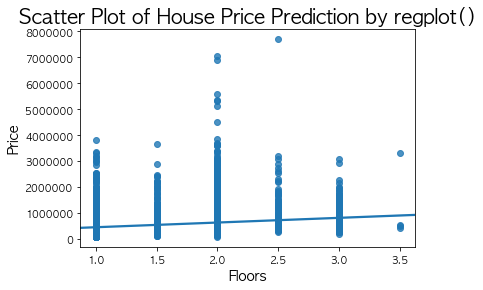

In [74]:
sns.regplot(x=train['floors'], 
           y=train['price'], 
           fit_reg=True) # no regression line
plt.title('Scatter Plot of House Price Prediction by regplot()', fontsize=20)
plt.xlabel('Floors', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

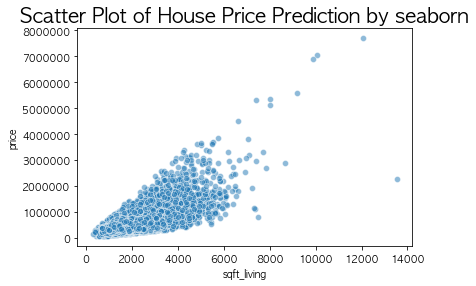

In [70]:
ax = sns.scatterplot(x = 'sqft_living',
                    y = 'price',
                    alpha=0.5,
                    data=train)
plt.title('Scatter Plot of House Price Prediction by seaborn', fontsize=20)
plt.show()

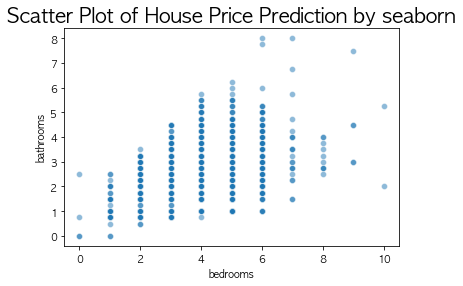

In [63]:
ax = sns.scatterplot(x = 'bedrooms',
                    y = 'bathrooms',
                    alpha=0.5,
                    data=train)
plt.title('Scatter Plot of House Price Prediction by seaborn', fontsize=20)
plt.show()

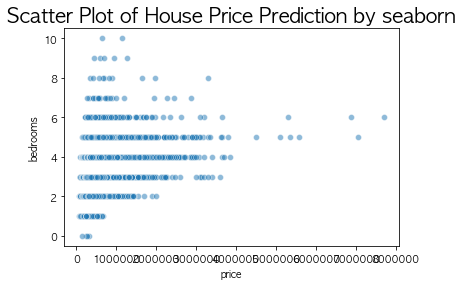

In [64]:
ax = sns.scatterplot(x = 'price',
                    y = 'bedrooms',
                    alpha=0.5,
                    data=train)
plt.title('Scatter Plot of House Price Prediction by seaborn', fontsize=20)
plt.show()

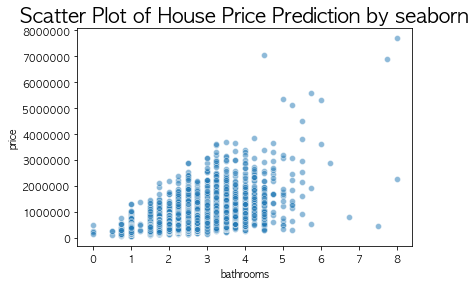

In [68]:
ax = sns.scatterplot(x = 'bathrooms',
                    y = 'price',
                    alpha=0.5,
                    data=train)
plt.title('Scatter Plot of House Price Prediction by seaborn', fontsize=20)
plt.show()

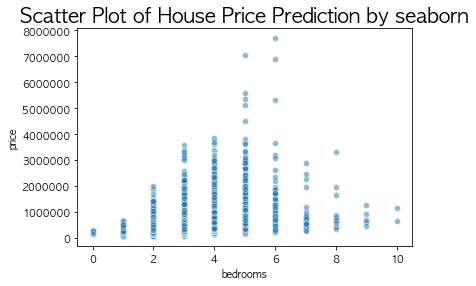

In [62]:
ax = sns.scatterplot(x = 'bedrooms',
                    y = 'price',
                    alpha=0.5,
                    data=train)
plt.title('Scatter Plot of House Price Prediction by seaborn', fontsize=20)
plt.show()

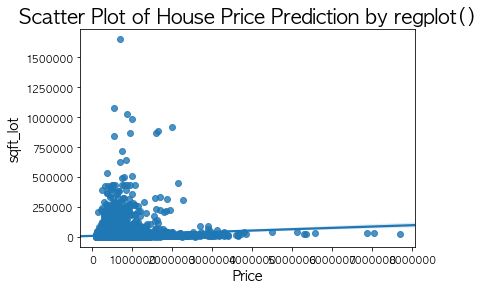

In [71]:
sns.regplot(x=train['price'], 
           y=train['sqft_lot'], 
           fit_reg=True) # no regression line
plt.title('Scatter Plot of House Price Prediction by regplot()', fontsize=20)
plt.xlabel('Price', fontsize=14)
plt.ylabel('sqft_lot', fontsize=14)
plt.show()

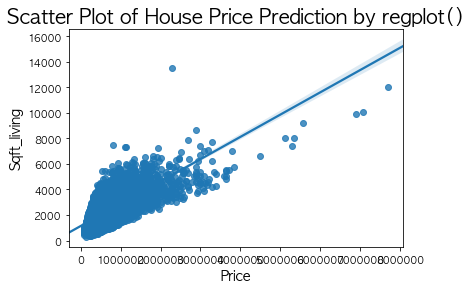

In [69]:
sns.regplot(x=train['price'], 
           y=train['sqft_living'], 
           fit_reg=True) # no regression line
plt.title('Scatter Plot of House Price Prediction by regplot()', fontsize=20)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Sqft_living', fontsize=14)
plt.show()

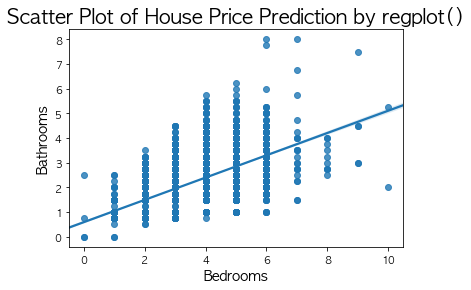

In [67]:
sns.regplot(x=train['bedrooms'], 
           y=train['bathrooms'], 
           fit_reg=True) # no regression line
plt.title('Scatter Plot of House Price Prediction by regplot()', fontsize=20)
plt.xlabel('Bedrooms', fontsize=14)
plt.ylabel('Bathrooms', fontsize=14)
plt.show()

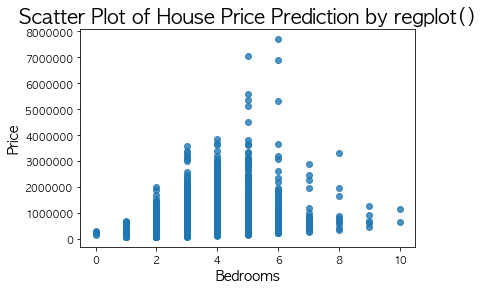

In [61]:
sns.regplot(x=train['bedrooms'], 
           y=train['price'], 
           fit_reg=False) # no regression line
plt.title('Scatter Plot of House Price Prediction by regplot()', fontsize=20)
plt.xlabel('Bedrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

In [60]:
train.bedrooms.value_counts().sort_index()

0        4
1      133
2     1931
3     6835
4     4797
5     1108
6      188
7       22
8       10
9        5
10       2
Name: bedrooms, dtype: int64

In [58]:
train.price.describe()

count    1.503500e+04
mean     5.406827e+05
std      3.715247e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [48]:
train.zipcode.value_counts().sort_index()

98001    239
98002    131
98003    185
98004    209
98005    115
98006    341
98007    103
98008    189
98010     63
98011    147
98014     90
98019    131
98022    159
98023    349
98024     54
98027    275
98028    201
98029    229
98030    192
98031    209
98032     85
98033    296
98034    382
98038    420
98039     36
98040    193
98042    372
98045    159
98052    408
98053    284
        ... 
98092    232
98102     75
98103    421
98105    174
98106    247
98107    192
98108    136
98109     78
98112    177
98115    408
98116    226
98117    387
98118    350
98119    127
98122    201
98125    294
98126    251
98133    344
98136    179
98144    240
98146    190
98148     44
98155    303
98166    176
98168    185
98177    170
98178    192
98188     91
98198    198
98199    213
Name: zipcode, Length: 70, dtype: int64

In [47]:
train.yr_renovated.value_counts().sort_index()

0       14404
1940        1
1944        1
1945        1
1946        1
1948        1
1950        1
1954        1
1955        3
1956        3
1957        2
1958        2
1962        2
1963        4
1964        4
1965        3
1967        2
1968        6
1969        3
1970        4
1971        2
1972        3
1973        2
1974        2
1975        4
1976        1
1977        6
1978        5
1979        8
1980        4
        ...  
1986        7
1987       11
1988       10
1989       15
1990       18
1991       15
1992       10
1993       10
1994       13
1995       14
1996       11
1997       10
1998       14
1999       13
2000       25
2001       15
2002       15
2003       25
2004       17
2005       24
2006       17
2007       25
2008       11
2009       15
2010       12
2011        8
2012        8
2013       28
2014       71
2015       11
Name: yr_renovated, Length: 65, dtype: int64

In [46]:
train.yr_built.value_counts().sort_index()

1900     59
1901     21
1902     20
1903     30
1904     36
1905     50
1906     60
1907     44
1908     61
1909     68
1910     84
1911     50
1912     52
1913     43
1914     40
1915     43
1916     62
1917     42
1918     79
1919     59
1920     72
1921     51
1922     68
1923     56
1924     91
1925    106
1926    131
1927     74
1928     93
1929     77
       ... 
1986    147
1987    223
1988    185
1989    210
1990    225
1991    160
1992    138
1993    143
1994    181
1995    124
1996    136
1997    120
1998    156
1999    182
2000    162
2001    221
2002    156
2003    284
2004    305
2005    302
2006    325
2007    281
2008    247
2009    158
2010    105
2011     97
2012    122
2013    137
2014    405
2015     28
Name: yr_built, Length: 116, dtype: int64

In [44]:
train.loc[:, ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]].describe()

sqft_living      sqft_lot    sqft_above  sqft_basement
count  15035.000000  1.503500e+04  15035.000000   15035.000000
mean    2083.790223  1.529697e+04   1794.158164     289.632059
std      922.134087  4.261282e+04    831.738609     440.663284
min      290.000000  5.200000e+02    290.000000       0.000000
25%     1430.000000  5.027500e+03   1190.000000       0.000000
50%     1910.000000  7.620000e+03   1570.000000       0.000000
75%     2560.000000  1.069550e+04   2230.000000     550.000000
max    13540.000000  1.651359e+06   9410.000000    4130.000000

In [45]:
train.loc[:, ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]]

sqft_living  sqft_lot  sqft_above  sqft_basement
0             1180      5650        1180              0
1              770     10000         770              0
2             1680      8080        1680              0
3             1715      6819        1715              0
4             1060      9711        1060              0
5             3560      9796        1860           1700
6             1160      6000         860            300
7             1430     19901        1430              0
8             1370      9680        1370              0
9             1810      4850        1810              0
10            2950      5000        1980            970
11            1890     14040        1890              0
12            1600      4300        1600              0
13            1200      9850        1200              0
14            1250      9774        1250              0
15            1620      4980         860            760
16            3050     44867        2330            720
17            1070      9643        1070              0
18            2450      6500        2450              0
19            1710      4697        1710              0
20            2450      2691        1750            700
21            1400      1581        1400              0
22            2320      3980        2320              0
23            2330      5000        1510            820
24            1090      3000        1090              0
25            2060      6659        1280            780
26            2300      3060        1510            790
27            2360      6000        2360              0
28            1220      8075         890            330
29            2620      7553        2620              0
...            ...       ...         ...            ...
15005         1450      5008         840            610
15006         2850      5577        1950            900
15007         3070      4684        2190            880
15008         1680      1570        1680              0
15009         3087      5002        3087              0
15010         1900      2631        1250            650
15011          940      1768         940              0
15012         1730      1229        1320            410
15013         2780      6000        2780              0
15014         1500      1290        1220            280
15015          710      1157         710              0
15016         1870      5000        1870              0
15017         1430      1201        1430              0
15018         1520      1488        1520              0
15019         1210      1278        1020            190
15020         2540      4760        2540              0
15021         4910      9444        3110           1800
15022         4170      8142        4170              0
15023         2500      5995        2500              0
15024         3600      9437        3600              0
15025         3410     10125        3410              0
15026         3990      7838        3990              0
15027         4470      8088        4470              0
15028         1425      1179        1425              0
15029         2270      5536        2270              0
15030         2520      6023        2520              0
15031         3510      7200        2600            910
15032         1530      1131        1530              0
15033         2310      5813        2310              0
15034         1020      1076        1020              0

[15035 rows x 4 columns]

In [42]:
train.grade.value_counts().sort_index()

1        1
3        2
4       23
5      174
6     1406
7     6228
8     4207
9     1855
10     781
11     288
12      61
13       9
Name: grade, dtype: int64

In [41]:
train.condition.value_counts().sort_index()

1      21
2     110
3    9793
4    3956
5    1155
Name: condition, dtype: int64

In [40]:
train.view.value_counts().sort_index()

0    13548
1      241
2      665
3      373
4      208
Name: view, dtype: int64

In [72]:
train.floors.value_counts().sort_index()

1.0    7361
1.5    1330
2.0    5810
2.5     113
3.0     417
3.5       4
Name: floors, dtype: int64

In [36]:
train.waterfront.value_counts()

0    14928
1      107
Name: waterfront, dtype: int64

In [37]:
test.waterfront.value_counts()

0    6412
1      56
Name: waterfront, dtype: int64

In [35]:
train.loc[:, "floors"]

0        1.0
1        1.0
2        1.0
3        2.0
4        1.0
5        1.0
6        1.0
7        1.5
8        1.0
9        1.5
10       2.0
11       2.0
12       1.5
13       1.0
14       1.0
15       1.0
16       1.0
17       1.0
18       2.0
19       1.5
20       2.0
21       1.5
22       2.0
23       1.5
24       1.5
25       1.0
26       1.5
27       2.0
28       1.0
29       2.0
        ... 
15005    1.0
15006    2.0
15007    2.0
15008    3.0
15009    2.0
15010    2.0
15011    2.0
15012    2.0
15013    2.0
15014    2.0
15015    2.0
15016    2.0
15017    3.0
15018    3.0
15019    2.0
15020    2.0
15021    1.5
15022    2.0
15023    2.0
15024    2.0
15025    2.0
15026    2.0
15027    2.0
15028    3.0
15029    2.0
15030    2.0
15031    2.0
15032    3.0
15033    2.0
15034    2.0
Name: floors, Length: 15035, dtype: float64

In [28]:
train.loc[:, ["bedrooms", "bathrooms"]].describe()

bedrooms     bathrooms
count  15035.000000  15035.000000
mean       3.369139      2.115065
std        0.902721      0.767519
min        0.000000      0.000000
25%        3.000000      1.750000
50%        3.000000      2.250000
75%        4.000000      2.500000
max       10.000000      8.000000

In [6]:
# train.loc[train.bathrooms > 7, "bedrooms":"bathrooms"]
train.loc[train.bedrooms == 0, :]

id             date     price  bedrooms  bathrooms  sqft_living  \
6885    6885  20141223T000000  235000.0         0       0.00         1470   
8826    8826  20150218T000000  320000.0         0       2.50         1490   
12781  12781  20141029T000000  265000.0         0       0.75          384   
13522  13522  20140926T000000  142000.0         0       0.00          290   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
6885       4800     2.0           0     0  ...      7        1470   
8826       7111     2.0           0     0  ...      7        1490   
12781    213444     1.0           0     0  ...      4         384   
13522     20875     1.0           0     0  ...      1         290   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
6885               0      1996             0    98065  47.5265 -121.828   
8826               0      1999             0    98065  47.5261 -121.826   
12781              0      2003             0    98070  47.4177 -122.491   
13522              0      1963             0    98024  47.5308 -121.888   

       sqft_living15  sqft_lot15  
6885            1060        7200  
8826            1500        4675  
12781           1920      224341  
13522           1620       22850  

[4 rows x 21 columns]

In [27]:
train.loc[:, "bathrooms"]

0        1.00
1        1.00
2        2.00
3        2.25
4        1.50
5        2.50
6        1.00
7        1.00
8        1.75
9        2.00
10       3.00
11       2.00
12       1.00
13       1.00
14       1.00
15       1.75
16       2.75
17       1.50
18       2.25
19       2.00
20       1.75
21       1.00
22       2.50
23       1.75
24       1.00
25       2.75
26       2.50
27       2.00
28       1.00
29       2.50
         ... 
15005    2.50
15006    3.50
15007    3.50
15008    3.00
15009    2.50
15010    3.25
15011    1.50
15012    3.25
15013    3.00
15014    2.25
15015    1.00
15016    2.50
15017    2.50
15018    2.50
15019    1.50
15020    2.50
15021    3.50
15022    3.75
15023    2.75
15024    2.75
15025    3.25
15026    3.00
15027    3.75
15028    2.50
15029    2.50
15030    2.50
15031    3.50
15032    2.50
15033    2.50
15034    0.75
Name: bathrooms, Length: 15035, dtype: float64

In [52]:
train.loc[:,"date"].sort_values().head()

2648    20140502T000000
4734    20140502T000000
754     20140502T000000
7160    20140502T000000
4002    20140502T000000
Name: date, dtype: object

In [53]:
train.loc[:,"date"].sort_values().tail()

13479    20150514T000000
8813     20150514T000000
5088     20150514T000000
14913    20150514T000000
12079    20150514T000000
Name: date, dtype: object

In [17]:
train.loc[:,"date"]

0        20141013T000000
1        20150225T000000
2        20150218T000000
3        20140627T000000
4        20150115T000000
5        20150403T000000
6        20140527T000000
7        20140528T000000
8        20141007T000000
9        20150312T000000
10       20150124T000000
11       20140731T000000
12       20140529T000000
13       20141205T000000
14       20150424T000000
15       20140514T000000
16       20140826T000000
17       20140516T000000
18       20141120T000000
19       20141103T000000
20       20140626T000000
21       20141201T000000
22       20141110T000000
23       20140624T000000
24       20141110T000000
25       20141203T000000
26       20140613T000000
27       20141230T000000
28       20150213T000000
29       20140620T000000
              ...       
15005    20140513T000000
15006    20150502T000000
15007    20140520T000000
15008    20140507T000000
15009    20141111T000000
15010    20150123T000000
15011    20140623T000000
15012    20140529T000000
15013    20141003T000000


In [18]:
date_string = train.loc[0,"date"]

In [19]:
date_string

'20141013T000000'

In [21]:
import datetime

In [26]:
convert_date = datetime.datetime.strptime(date_string, "%Y%m%dT%H%M%S")
print(convert_date)

2014-10-13 00:00:00


In [57]:
from datetime import datetime, timedelta
date_string = train.loc[0, "date"]
convert_date = datetime.strptime(date_string, "%Y%m%dT%H%M%S")
end_date = datetime(2015, 5, 14, 0, 0, 0)
print(convert_date)
print(end_date)
# now_date = datetime.now()
# print((now_date - convert_date).days)
print((end_date - convert_date).days)

2014-10-13 00:00:00
2015-05-14 00:00:00
213


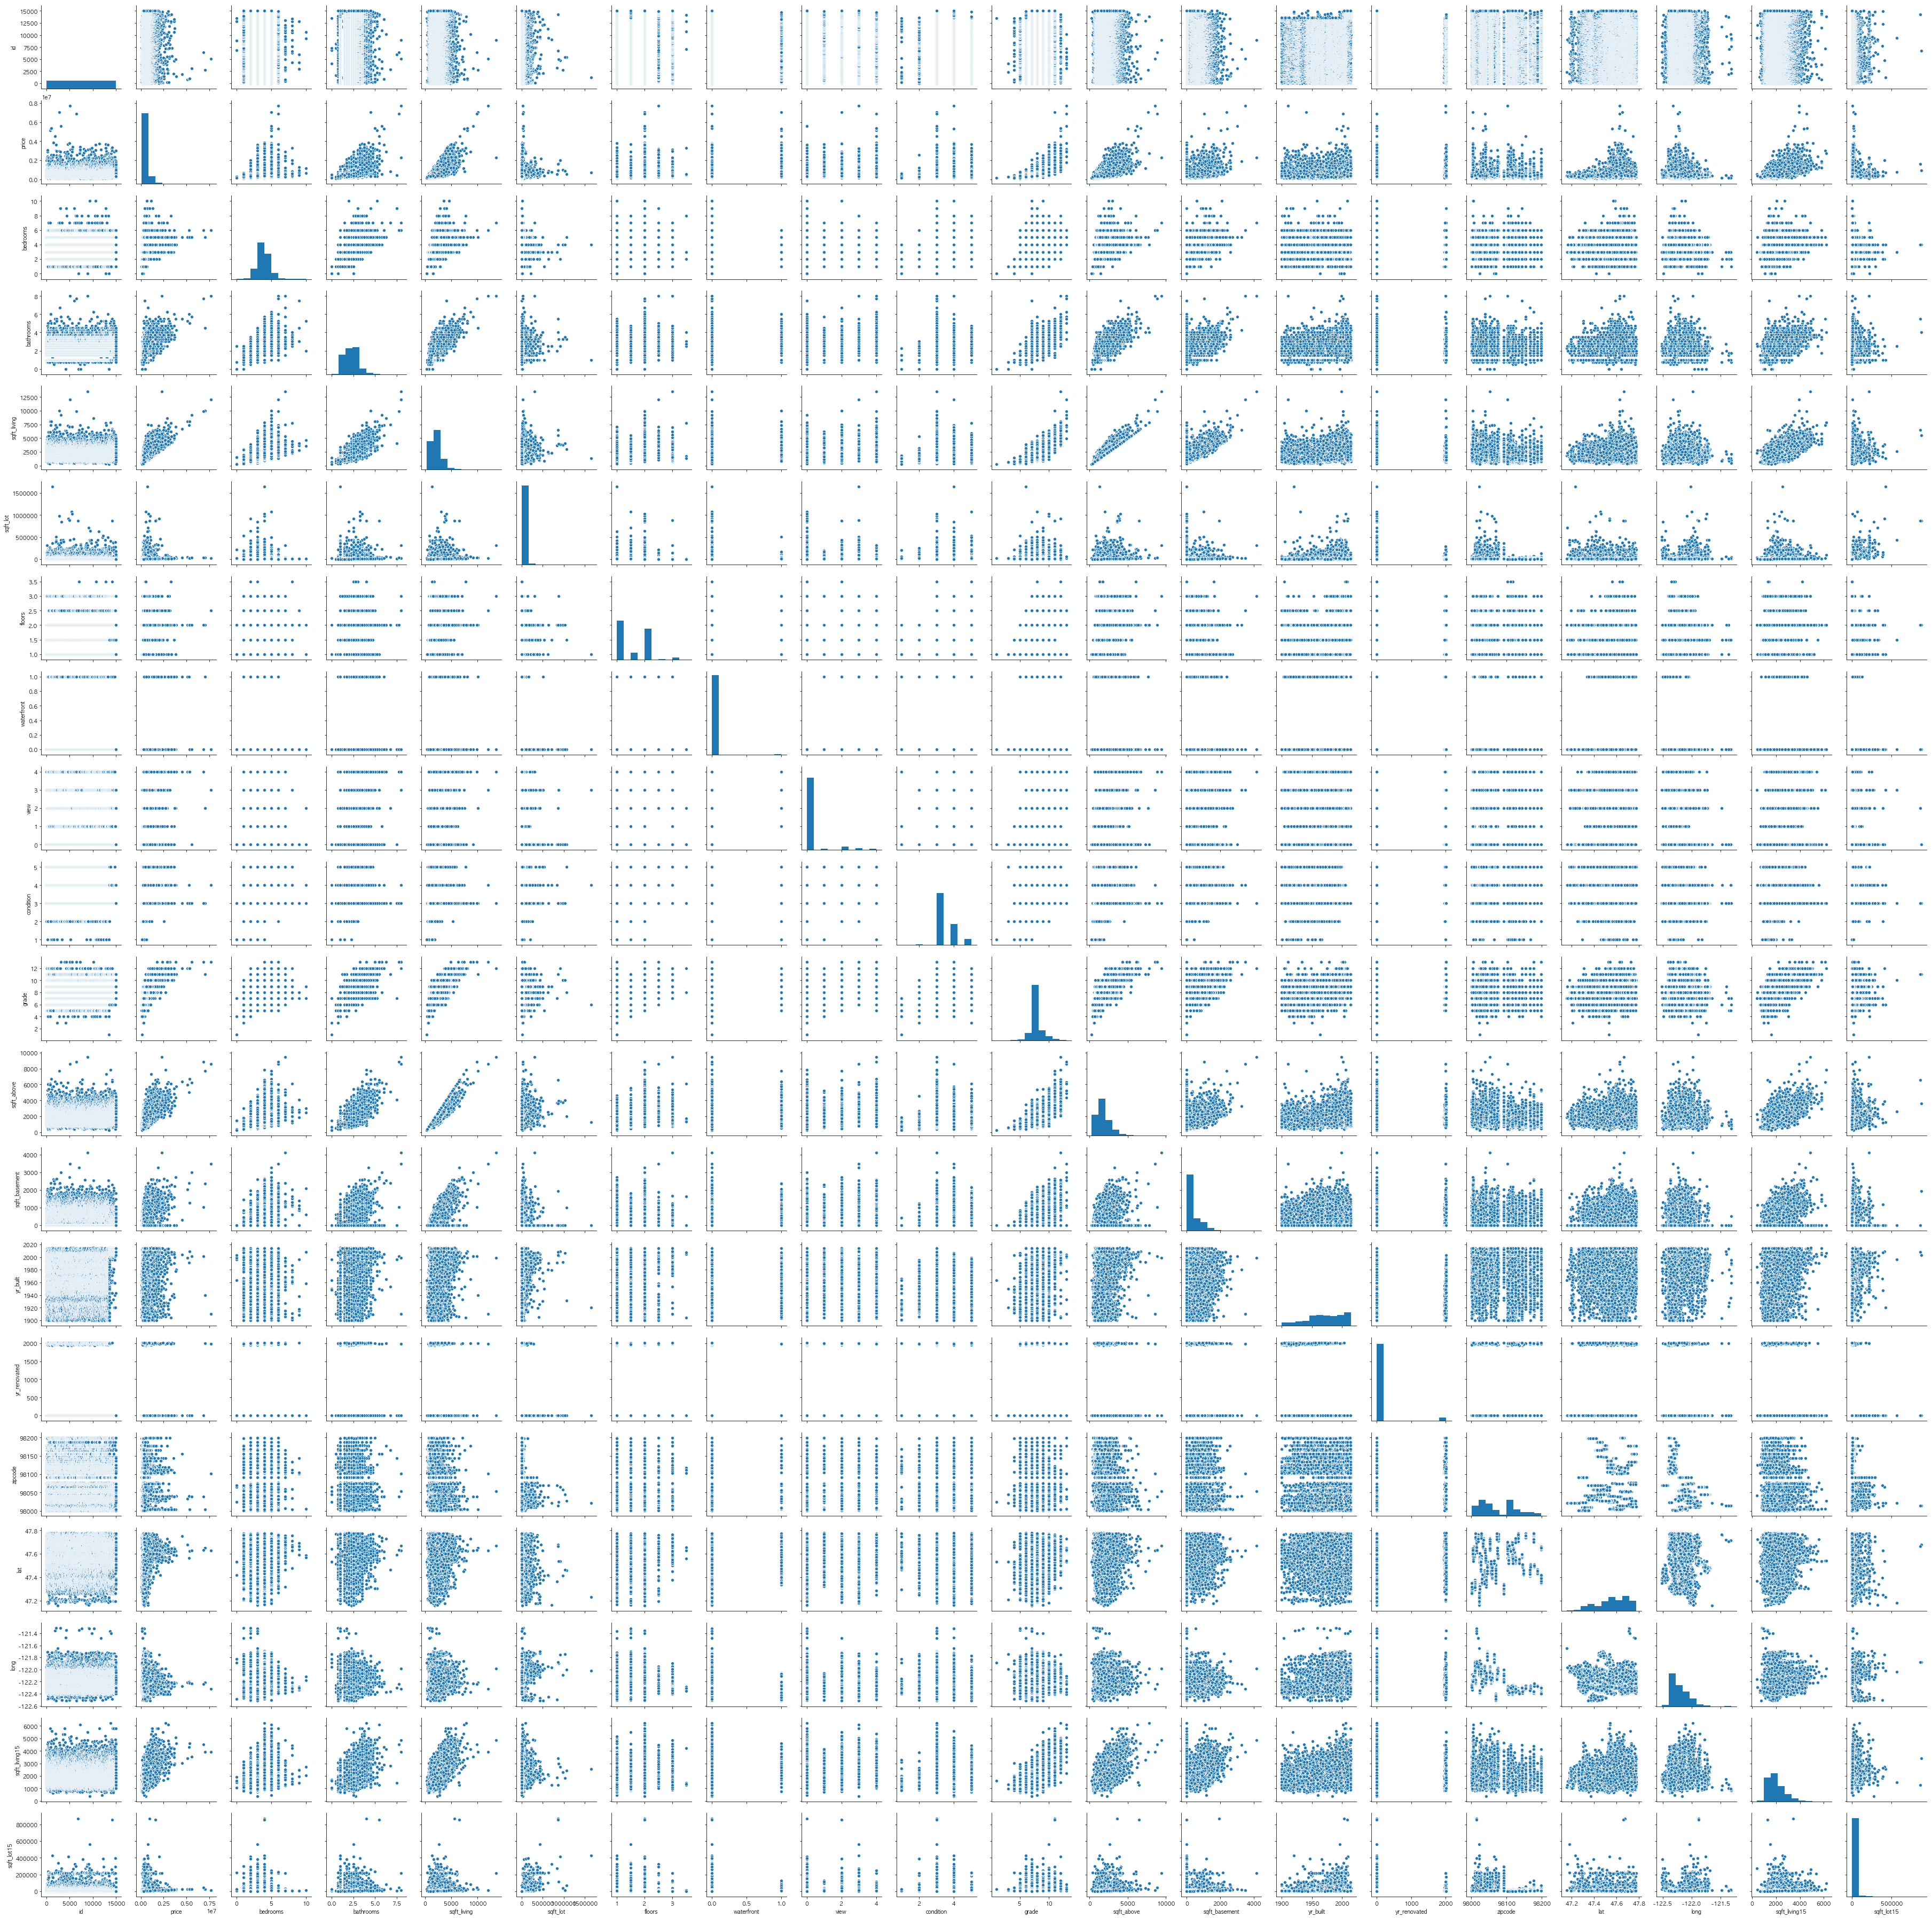

In [75]:
# scatterplot matrix with histogram only for continuous variables
sns.pairplot(train, diag_kind='hist')
plt.show()


In [4]:
# import plotly standard
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Cufflinks wrapper on plotly
import cufflinks as cf

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell

# plotly + cufflinks in offline mode
from plotly.offline import iplot
cf.go_offline()

# set the global theme
cf.set_config_file(world_readable=True, theme='pearl', offline=True)

fig = ff.create_scatterplotmatrix(
    train[['price', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
          'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 
          'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 
          'sqft_living15', 'sqft_lot15']],
    height=800,
    width=800, 
    diag='histogram') # scatter, histogram, box
iplot(fig) # offline mode
# 출처: https://rfriend.tistory.com/416 [R, Python 분석과 프로그래밍 (by R Friend)]

ModuleNotFoundError: No module named 'cufflinks'

In [76]:
# scatterplot matrix by plotly with box plot at diagonal & different color by index(GROUP)
fig = ff.create_scatterplotmatrix(
    train,
    height=800,
    width=800, 
    diag='box', # scatter, histogram, box
    index='species')
iplot(fig)




NameError: name 'ff' is not defined